In [1]:
import pandas
data = pandas.read_csv("benchmark_lddt.csv")
data.head()

Unnamed: 0  cathsm_coverage  cathsm_oligo_lddt  cathsm_qmean4  \
0           0         1.000000           0.813056          -1.08   
1           1         1.000000           0.693439          -3.02   
2           2         1.000000           0.637661          -4.83   
3           3         0.971831           0.673953          -1.31   
4           4         0.990991           0.541722          -4.06   

   cathsm_single_chain_lddt cathsm_template  cathsm_weighted_lddt   hit  \
0                  0.813056        4ptx.2.A              0.813056  hit1   
1                  0.693439        1myr.1.A              0.693439  hit3   
2                  0.637661        4ha4.1.A              0.637661  hit2   
3                  0.673953        1ych.2.B              0.673953  hit1   
4                  0.541722        5nul.1.A              0.541722  hit2   

   hit_from  hit_rank  ...  sm_coverage  sm_oligo_lddt  sm_qmean4  \
0        18         1  ...          1.0       0.823526      -2.47   
1        17         2  ...          1.0       0.822760      -2.47   
2        21         3  ...          1.0       0.824045      -2.47   
3         3         1  ...          1.0       0.174101      -3.83   
4         2         2  ...          1.0       0.180253      -3.83   

   sm_qmeandisco  sm_rank  sm_single_chain_lddt  sm_template sm_weighted_lddt  \
0       0.790734        1              0.823526     5idi.1.A         0.823526   
1       0.790711        1              0.822760     5idi.1.A         0.822760   
2       0.791037        1              0.824045     5idi.1.A         0.824045   
3       0.696320        1              0.696405     2ark.1.A         0.174101   
4       0.699347        1              0.721013     2ark.1.A         0.180253   

                target target_length  
0  20180804_00000006_1           455  
1  20180804_00000006_1           455  
2  20180804_00000006_1           455  
3  20180804_00000357_1           149  
4  20180804_00000357_1           149  

[5 rows x 21 columns]

In [2]:
# Where do we see the same template?
# We use the SMTL chain index (Aug 28, 2019 version)
chain_index = pandas.read_table("smtl_chain_index", sep=" ", index_col=False,
                             names=['md5', 'chain'])
# Sanity check:
assert not any(chain_index['chain'].duplicated())

# Find MD5 of CATH-SM templates
cathsm_md5 = data[['cathsm_template']].merge(chain_index, 'left', left_on = 'cathsm_template', right_on = 'chain')
# cathsm_md5[cathsm_md5['cathsm_template'] != cathsm_md5['chain']]
cathsm_md5_nona = cathsm_md5.dropna()  # 4igz.1.A and 2ma0.1.A are obsolete
assert all(cathsm_md5_nona['cathsm_template'] == cathsm_md5_nona['chain'])

# Find MD5 of SM templates
sm_md5 = data[['sm_template']].merge(chain_index, 'left', left_on = 'sm_template', right_on = 'chain')
# sm_md5[sm_md5['sm_template'] != sm_md5['chain']]
sm_md5_nona = sm_md5.dropna()  # 6gww.3.B and 4eln.1.A are obsolete
assert all(sm_md5_nona['sm_template'] == sm_md5_nona['chain'])

# Add the MD5 to main dataset
# Assumption: left merge in pandas keeps key order. This is the case in 0.25.1,
# see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
# "left: use only keys from left frame, similar to a SQL left outer join; preserve key order."
data['same_template_md5'] = cathsm_md5['md5'] == sm_md5['md5']
print("Same MD5: \n" + str(data['same_template_md5'].value_counts()))

# Alternatively we can look whether we have the same PDB ID
data['same_template_pdbid'] = data['cathsm_template'].str.slice(0, 4) == data['sm_template'].str.slice(0, 4)
print("\nSame PDB ID: \n" + str(data['same_template_pdbid'].value_counts()))

Same MD5: 
False    1170
True       78
Name: same_template_md5, dtype: int64

Same PDB ID: 
False    1189
True       59
Name: same_template_pdbid, dtype: int64


## Descriptive statistics

In [3]:
import matplotlib.pyplot as plt
plt.hist(data['target_length'])
plt.show()

<Figure size 640x480 with 1 Axes>

## Full data set

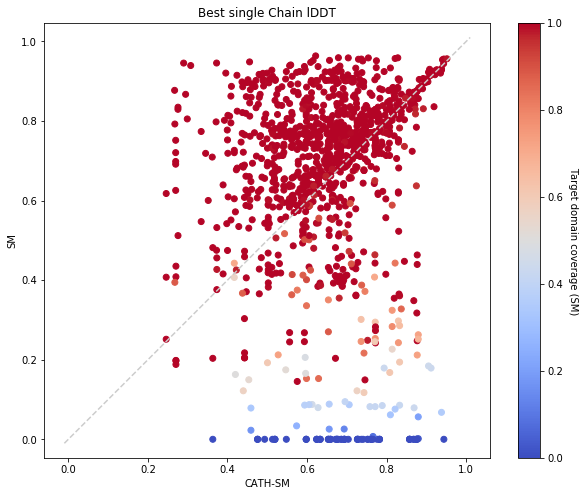

In [4]:
# Single chain lDDT plot - color by SM coverage
import matplotlib as mpl
import matplotlib.pyplot as plt
# %matplotlib nbagg
%matplotlib inline
# %matplotlib notebook
mpl.rcParams["figure.figsize"] = (10, 8)
# Identity line
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
ax = plt.gca()
plt.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".8")
# Main plot
plt.scatter(data['cathsm_single_chain_lddt'], data['sm_single_chain_lddt'],
            c=data['sm_coverage'], cmap='coolwarm')
# Axis labels
plt.title("Best single Chain lDDT")
plt.xlabel("CATH-SM")
plt.ylabel("SM")
# Setup color bar
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
plt.axis('equal')
cbar.set_label('Target domain coverage (SM)', rotation=270)
plt.show()

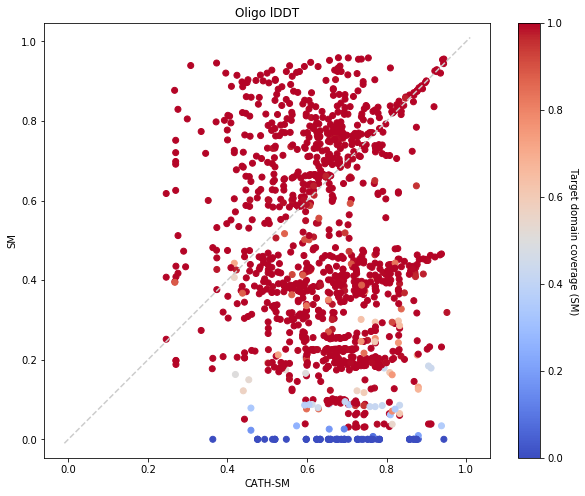

In [5]:
# oligo lDDT plot - color by SM coverage
import matplotlib as mpl
import matplotlib.pyplot as plt
# %matplotlib nbagg
%matplotlib inline
# %matplotlib notebook
mpl.rcParams["figure.figsize"] = (10, 8)
# Identity line
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
ax = plt.gca()
plt.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".8")
# Main plot
plt.scatter(data['cathsm_oligo_lddt'], data['sm_oligo_lddt'],
            c=data['sm_coverage'], cmap='coolwarm')
# Axis labels
plt.title("Oligo lDDT")
plt.xlabel("CATH-SM")
plt.ylabel("SM")
# Setup color bar
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
plt.axis('equal')
cbar.set_label('Target domain coverage (SM)', rotation=270)
plt.show()

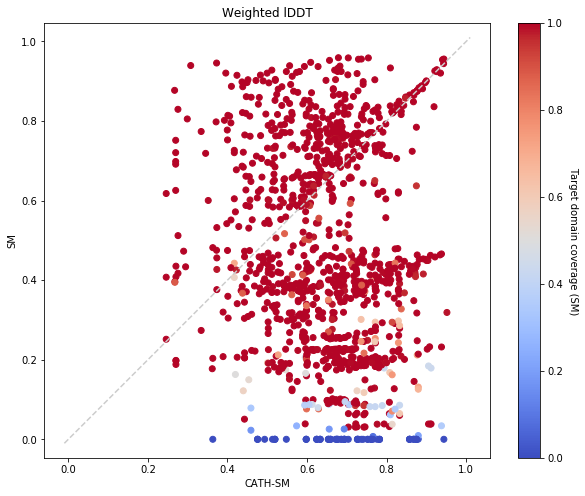

In [6]:
# Weighted lDDT plot - color by SM coverage
import matplotlib as mpl
import matplotlib.pyplot as plt
# %matplotlib nbagg
%matplotlib inline
# %matplotlib notebook
mpl.rcParams["figure.figsize"] = (10, 8)
# Identity line
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
ax = plt.gca()
plt.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".8")
# Main plot
plt.scatter(data['cathsm_weighted_lddt'], data['sm_weighted_lddt'],
            c=data['sm_coverage'], cmap='coolwarm')
# Axis labels
plt.title("Weighted lDDT")
plt.xlabel("CATH-SM")
plt.ylabel("SM")
# Setup color bar
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
plt.axis('equal')
cbar.set_label('Target domain coverage (SM)', rotation=270)
plt.show()

Oligo lDDT and Weighted lDDT show different quaternary structures. Not very relevant here. Following plots will all show the best single chain lDDT.

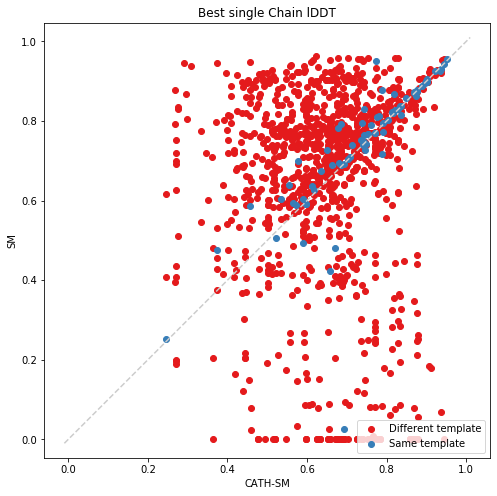

In [7]:
# Single chain lDDT plot - color by template identity
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# %matplotlib nbagg
%matplotlib inline
# %matplotlib notebook
mpl.rcParams["figure.figsize"] = (8, 8)
# Identity line
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
ax = plt.gca()
plt.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".8")
# Main plot
same_template = data[data['same_template_md5']]
diff_template = data[data['same_template_md5'] == False]
plt.scatter(diff_template['cathsm_single_chain_lddt'], 
            diff_template['sm_single_chain_lddt'], 
            c=np.array([plt.cm.Set1(0)]), label="Different template")
plt.scatter(same_template['cathsm_single_chain_lddt'], 
            same_template['sm_single_chain_lddt'], 
            c=np.array([plt.cm.Set1(1)]), label="Same template")

# Axis labels
plt.title("Best single Chain lDDT")
plt.xlabel("CATH-SM")
plt.ylabel("SM")
# Setup legend
plt.legend(loc='lower right')
cbar.ax.get_yaxis().labelpad = 15
plt.axis('equal')
plt.show()

## First hit

Look only at the first-ranking funfams hit and first SWISS-MODEL (global QMEAN4)

In [8]:
first_hit = data[(data['hit_rank'] == 1) & (data['sm_rank'] == 1)]
first_hit.head()

Unnamed: 0  cathsm_coverage  cathsm_oligo_lddt  cathsm_qmean4  \
0            0         1.000000           0.813056          -1.08   
3            3         0.971831           0.673953          -1.31   
5            5         0.936709           0.722493          -1.28   
16          16         1.000000           0.657385          -1.29   
22          22         1.000000           0.752211          -0.16   

    cathsm_single_chain_lddt cathsm_template  cathsm_weighted_lddt   hit  \
0                   0.813056        4ptx.2.A              0.813056  hit1   
3                   0.673953        1ych.2.B              0.673953  hit1   
5                   0.722493        1j32.1.A              0.722493  hit2   
16                  0.657385        3iq2.2.A              0.657385  hit8   
22                  0.752211        3eif.1.A              0.752211  hit1   

    hit_from  hit_rank  ...  sm_qmean4  sm_qmeandisco  sm_rank  \
0         18         1  ...      -2.47       0.790734        1   
3          3         1  ...      -3.83       0.696320        1   
5        116         1  ...      -1.16       0.813228        1   
16        34         1  ...      -1.17       0.812442        1   
22       691         1  ...      -3.33       0.780902        1   

    sm_single_chain_lddt  sm_template  sm_weighted_lddt               target  \
0               0.823526     5idi.1.A          0.823526  20180804_00000006_1   
3               0.696405     2ark.1.A          0.174101  20180804_00000357_1   
5               0.769298     1bkg.1.A          0.384649  20180804_00000360_1   
16              0.750194     5xdz.1.A          0.750194  20180804_00000364_1   
22              0.766653     3eif.1.A          0.766653  20180804_00000377_1   

   target_length  same_template_md5 same_template_pdbid  
0            455              False               False  
3            149              False               False  
5            475              False               False  
16           125              False               False  
22          1647               True                True  

[5 rows x 23 columns]

In [9]:
# Number of models built
print(data.shape[0])
print(first_hit.shape[0])

1248
203


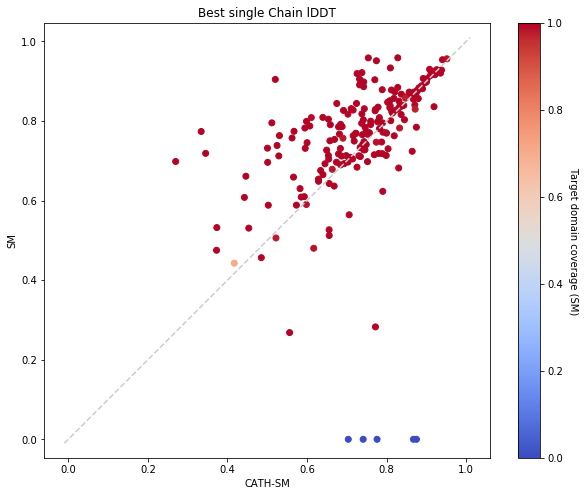

In [10]:
# Single chain lDDT plot
import matplotlib as mpl
import matplotlib.pyplot as plt
# %matplotlib nbagg
%matplotlib inline
# %matplotlib notebook
mpl.rcParams["figure.figsize"] = (10, 8)
# Identity line
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
ax = plt.gca()
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".8")
# Main plot
plt.scatter(first_hit['cathsm_single_chain_lddt'], first_hit['sm_single_chain_lddt'],
            c=first_hit['sm_coverage'], cmap='coolwarm')
# Axis labels
plt.title("Best single Chain lDDT")
plt.xlabel("CATH-SM")
plt.ylabel("SM")
# Setup color bar
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
plt.axis('equal')
cbar.set_label('Target domain coverage (SM)', rotation=270)
plt.show()

## Resolved hits

Look at the resolved hits - can have several models per target sequence

In [11]:
# Import the resolved hits data
besthits = pandas.read_table("cameo_models.besthits.crh", sep=" ", comment="#", index_col=False,
                             names=['target', 'hit', 'normalised_qmean4', 'query_range', 'resolved_range'])
besthits.head()

target   hit  normalised_qmean4 query_range resolved_range
0  20180804_00000006_1  hit1              98.92      18-453         18-453
1  20180804_00000357_1  hit1              98.69       3-144          3-144
2  20180804_00000360_1  hit2              98.72     116-352        116-352
3  20180804_00000364_1  hit8              98.71      34-119         34-119
4  20180804_00000377_1  hit3              98.37     481-549        481-549

### First SM model - QMEAN4

In [12]:
# Look at the best hits - ie we may have multiple domains for a target
# Still look only at the first SWISS-MODEL based on QMEAN4
besthits_data = besthits.merge(data, on=['target', 'hit'], how='inner')
besthits_first_sm = besthits_data[besthits_data['sm_rank'] == 1]
besthits_first_sm.head()

target   hit  normalised_qmean4 query_range resolved_range  \
0  20180804_00000006_1  hit1              98.92      18-453         18-453   
1  20180804_00000357_1  hit1              98.69       3-144          3-144   
2  20180804_00000360_1  hit2              98.72     116-352        116-352   
3  20180804_00000364_1  hit8              98.71      34-119         34-119   
4  20180804_00000377_1  hit3              98.37     481-549        481-549   

   Unnamed: 0  cathsm_coverage  cathsm_oligo_lddt  cathsm_qmean4  \
0           0         1.000000           0.813056          -1.08   
1           3         0.971831           0.673953          -1.31   
2           5         0.936709           0.722493          -1.28   
3          16         1.000000           0.657385          -1.29   
4          27         0.983051           0.442923          -1.63   

   cathsm_single_chain_lddt  ... sm_oligo_lddt  sm_qmean4  sm_qmeandisco  \
0                  0.813056  ...      0.823526      -2.47       0.790734   
1                  0.673953  ...      0.174101      -3.83       0.696320   
2                  0.722493  ...      0.384649      -1.16       0.813228   
3                  0.657385  ...      0.750194      -1.17       0.812442   
4                  0.442923  ...      0.458881      -3.33       0.734783   

   sm_rank  sm_single_chain_lddt  sm_template  sm_weighted_lddt  \
0        1              0.823526     5idi.1.A          0.823526   
1        1              0.696405     2ark.1.A          0.174101   
2        1              0.769298     1bkg.1.A          0.384649   
3        1              0.750194     5xdz.1.A          0.750194   
4        1              0.458881     3eif.1.A          0.458881   

   target_length  same_template_md5  same_template_pdbid  
0            455              False                False  
1            149              False                False  
2            475              False                False  
3            125              False                False  
4           1647              False                False  

[5 rows x 26 columns]

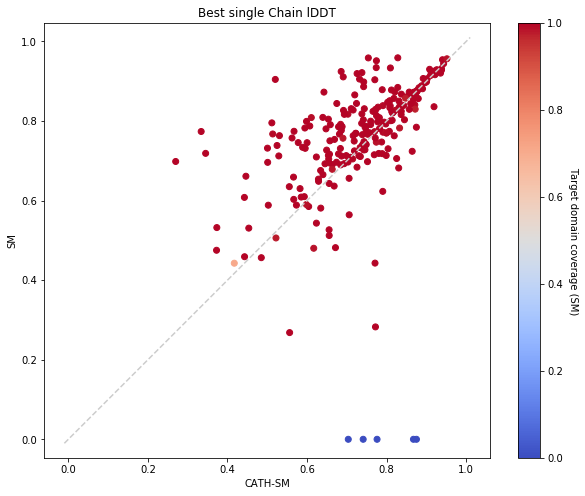

In [13]:
# Single chain lDDT plot
import matplotlib as mpl
import matplotlib.pyplot as plt
# %matplotlib nbagg
%matplotlib inline
# %matplotlib notebook
mpl.rcParams["figure.figsize"] = (10, 8)
# Identity line
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
ax = plt.gca()
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".8")
# Main plot
plt.scatter(besthits_first_sm['cathsm_single_chain_lddt'], besthits_first_sm['sm_single_chain_lddt'],
            c=besthits_first_sm['sm_coverage'], cmap='coolwarm')
# Axis labels
plt.title("Best single Chain lDDT")
plt.xlabel("CATH-SM")
plt.ylabel("SM")
# Setup color bar
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
plt.axis('equal')
cbar.set_label('Target domain coverage (SM)', rotation=270)
plt.show()

### Best SM model - lDDT

Still resolved hits but select SWISS-MODEL model based on lDDT

In [14]:
besthits_best_sm = besthits_data \
    .sort_values('sm_single_chain_lddt', ascending=False) \
    .drop_duplicates(['target','hit'])

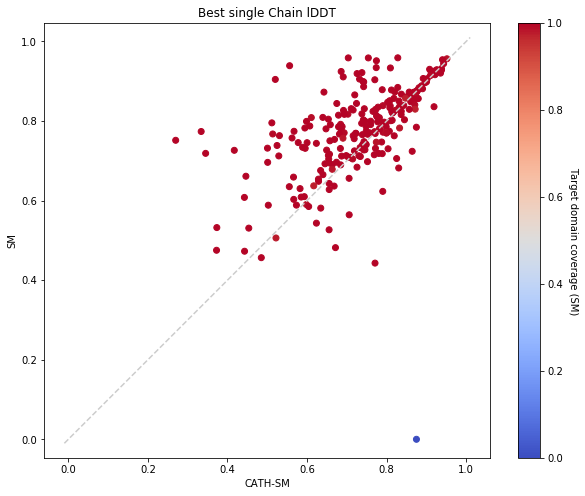

In [15]:
# Single chain lDDT plot
import matplotlib as mpl
import matplotlib.pyplot as plt
# %matplotlib nbagg
%matplotlib inline
# %matplotlib notebook
mpl.rcParams["figure.figsize"] = (10, 8)
# Identity line
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
ax = plt.gca()
plt.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".8")
# Main plot
plt.scatter(besthits_best_sm['cathsm_single_chain_lddt'], besthits_best_sm['sm_single_chain_lddt'],
            c=besthits_best_sm['sm_coverage'], cmap='coolwarm')
# Axis labels
plt.title("Best single Chain lDDT")
plt.xlabel("CATH-SM")
plt.ylabel("SM")
# Setup color bar
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
plt.axis('equal')
cbar.set_label('Target domain coverage (SM)', rotation=270)
plt.show()

In [16]:
# Now we're left with only one outlier on coverage...
besthits_best_sm = besthits_best_sm.assign(sm_cathsm_diff=besthits_best_sm['sm_single_chain_lddt'] - besthits_best_sm['cathsm_single_chain_lddt'])
besthits_best_sm.sort_values('sm_cathsm_diff').head()

target   hit  normalised_qmean4 query_range resolved_range  \
406  20181222_00000059_1  hit1             100.38     764-924        764-924   
156  20180922_00000066_1  hit4              96.23     868-981        868-981   
397  20181222_00000029_1  hit2              95.41     251-456        251-456   
155  20180922_00000066_1  hit2              97.92     571-835        571-835   
428  20181229_00000062_1  hit2             100.52       1-109          1-109   

     Unnamed: 0  cathsm_coverage  cathsm_oligo_lddt  cathsm_qmean4  \
406        1102         1.000000           0.874928           0.38   
156         527         0.989796           0.770813          -3.77   
397        1087         1.000000           0.671407          -4.59   
155         525         1.000000           0.790257          -2.08   
428        1147         1.000000           0.830310           0.52   

     cathsm_single_chain_lddt  ... sm_qmean4  sm_qmeandisco  sm_rank  \
406                  0.874928  ...     -5.43            NaN        3   
156                  0.770813  ...     -3.82       0.556754        1   
397                  0.671407  ...     -4.18       0.643641        1   
155                  0.790257  ...     -3.82       0.696226        1   
428                  0.830310  ...     -2.63       0.714037        1   

     sm_single_chain_lddt  sm_template  sm_weighted_lddt  target_length  \
406              0.000000     4zln.1.A          0.000000            943   
156              0.442808     2alw.1.A          0.442808            981   
397              0.481716     3eb7.1.A          0.481716            609   
155              0.623139     2alw.1.A          0.623139            981   
428              0.681892     3vbb.1.A          0.340946            456   

     same_template_md5  same_template_pdbid  sm_cathsm_diff  
406              False                False       -0.874928  
156              False                False       -0.328005  
397               True                 True       -0.189690  
155              False                False       -0.167118  
428              False                False       -0.148417  

[5 rows x 27 columns]

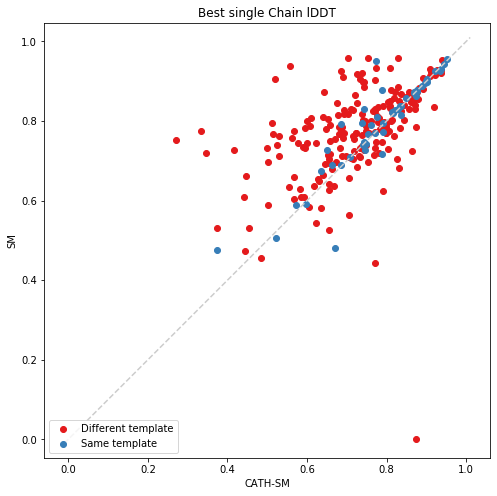

In [17]:
# Single chain lDDT plot - color by template identity
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# %matplotlib nbagg
%matplotlib inline
# %matplotlib notebook
mpl.rcParams["figure.figsize"] = (8, 8)
# Identity line
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
ax = plt.gca()
plt.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".8")
# Main plot
same_template = besthits_best_sm[besthits_best_sm['same_template_md5']]
#same_template = same_template[same_template['target'] == '20181103_00000042_1']
diff_template = besthits_best_sm[besthits_best_sm['same_template_md5'] == False]
#diff_template = diff_template[diff_template['target'] == '20181103_00000042_1']
plt.scatter(diff_template['cathsm_single_chain_lddt'], 
            diff_template['sm_single_chain_lddt'], 
            c=np.array([plt.cm.Set1(0)]), label="Different template")
plt.scatter(same_template['cathsm_single_chain_lddt'], 
            same_template['sm_single_chain_lddt'], 
            c=np.array([plt.cm.Set1(1)]), label="Same template")

# Axis labels
plt.title("Best single Chain lDDT")
plt.xlabel("CATH-SM")
plt.ylabel("SM")
# Setup legend
plt.legend(loc='lower left')
cbar.ax.get_yaxis().labelpad = 15
plt.axis('equal')
plt.show()

In [18]:
# Look at points in the top left - better in SM, bad in CATH-SM
#besthits_best_sm[besthits_best_sm['same_template_md5']].sort_values('sm_cathsm_diff').tail()
besthits_best_sm.sort_values('sm_cathsm_diff').tail(n=10)

target    hit  normalised_qmean4 query_range resolved_range  \
340  20181201_00000066_1   hit7              98.63     699-870        699-870   
220  20181020_00000031_1   hit3              97.52      75-165         75-165   
85   20180901_00000023_2   hit2              97.13       51-94          51-94   
316  20181124_00000044_1   hit3              93.22       9-248          9-248   
167  20180929_00000076_1   hit4              98.06     112-245        112-245   
243  20181027_00000052_1   hit2              96.35     329-616        329-616   
335  20181201_00000065_2   hit1              95.41        2-84           2-84   
146  20180922_00000047_1   hit1              94.03     144-255        144-255   
68   20180818_00000057_1  hit15              98.98     438-535        438-535   
337  20181201_00000066_1   hit3              98.31      22-189         22-189   

     Unnamed: 0  cathsm_coverage  cathsm_oligo_lddt  cathsm_qmean4  \
340         990         0.982558           0.703588          -1.37   
220         678         0.989011           0.511489          -2.48   
85          346         0.975610           0.417097          -2.87   
316         951         1.000000           0.345074          -6.78   
167         545         1.000000           0.556177          -1.94   
243         782         0.996479           0.520186          -3.65   
335         987         1.000000           0.333855          -4.59   
146         514         1.000000           0.269790          -5.97   
68          255              NaN                NaN          -1.02   
337         991              NaN                NaN          -1.69   

     cathsm_single_chain_lddt  ... sm_qmean4  sm_qmeandisco  sm_rank  \
340                  0.703588  ...     -2.03       0.830698        2   
220                  0.511489  ...     -0.86       0.840000        1   
85                   0.417097  ...     -3.60       0.637273        3   
316                  0.345074  ...     -3.20       0.671757        1   
167                  0.556177  ...     -2.06       0.818657        3   
243                  0.520186  ...     -1.22       0.863160        1   
335                  0.333855  ...     -0.90       0.856145        1   
146                  0.269790  ...     -3.29       0.735357        2   
68                        NaN  ...     -0.71       0.821327        1   
337                       NaN  ...     -2.29       0.851125        1   

     sm_single_chain_lddt  sm_template  sm_weighted_lddt  target_length  \
340              0.958641     5bvk.1.A          0.958641            876   
220              0.795330     3t1v.1.A          0.795330            203   
85               0.726333     2w6d.1.B          0.726333            614   
316              0.718664     4lk4.1.A          0.718664            506   
167              0.938984     6bxf.1.A          0.938984            625   
243              0.904523     5dvy.1.A          0.904523            666   
335              0.773624     2rb8.1.A          0.773624             87   
146              0.751523     6eou.1.A          0.751523            320   
68                    NaN     5dv9.1.A               NaN            546   
337                   NaN     4ag4.1.A               NaN            876   

     same_template_md5  same_template_pdbid  sm_cathsm_diff  
340              False                False        0.255053  
220              False                False        0.283841  
85               False                False        0.309236  
316              False                False        0.373591  
167              False                False        0.382807  
243              False                False        0.384337  
335              False                False        0.439768  
146              False                False        0.481734  
68               False                False             NaN  
337              False                False             NaN  

[10 rows x 27 columns]

In [19]:
besthits_best_sm['same_template_md5'].value_counts()

False    196
True      51
Name: same_template_md5, dtype: int64

In [20]:
# Look at the points in the bottom right - high lDDT in CATH-SM models, low in SM
# Ignore domains that SM didn't cover for now.
besthits_best_sm = besthits_best_sm.assign(sc_lddt_diff=pandas.Series(besthits_best_sm['cathsm_single_chain_lddt'] - besthits_best_sm['sm_single_chain_lddt']).values)
besthits_best_sm.sort_values('sc_lddt_diff', ascending=False).head(n=10)

target   hit  normalised_qmean4 query_range resolved_range  \
406  20181222_00000059_1  hit1             100.38     764-924        764-924   
156  20180922_00000066_1  hit4              96.23     868-981        868-981   
397  20181222_00000029_1  hit2              95.41     251-456        251-456   
155  20180922_00000066_1  hit2              97.92     571-835        571-835   
428  20181229_00000062_1  hit2             100.52       1-109          1-109   
174  20181006_00000000_1  hit2              97.77        5-75           5-75   
164  20180929_00000058_1  hit1              98.77        1-70           1-70   
388  20181215_00000148_1  hit1              96.35      26-187         26-187   
153  20180922_00000066_1  hit1              97.88      14-290         14-290   
426  20181229_00000060_1  hit1             100.97     247-349        247-349   

     Unnamed: 0  cathsm_coverage  cathsm_oligo_lddt  cathsm_qmean4  \
406        1102         1.000000           0.874928           0.38   
156         527         0.989796           0.770813          -3.77   
397        1087         1.000000           0.671407          -4.59   
155         525         1.000000           0.790257          -2.08   
428        1147         1.000000           0.830310           0.52   
174         558         1.000000           0.705899          -2.23   
164         542         0.957143           0.864253          -1.23   
388        1072         1.000000           0.655372          -3.65   
153         526         1.000000           0.825136          -2.12   
426        1145         1.000000           0.874770           0.97   

     cathsm_single_chain_lddt  ... sm_qmeandisco  sm_rank  \
406                  0.874928  ...           NaN        3   
156                  0.770813  ...      0.556754        1   
397                  0.671407  ...      0.643641        1   
155                  0.790257  ...      0.696226        1   
428                  0.830310  ...      0.714037        1   
174                  0.705899  ...      0.650845        1   
164                  0.864253  ...      0.718286        1   
388                  0.655372  ...      0.595494        1   
153                  0.825136  ...      0.724765        1   
426                  0.874770  ...      0.783495        1   

     sm_single_chain_lddt  sm_template  sm_weighted_lddt  target_length  \
406              0.000000     4zln.1.A          0.000000            943   
156              0.442808     2alw.1.A          0.442808            981   
397              0.481716     3eb7.1.A          0.481716            609   
155              0.623139     2alw.1.A          0.623139            981   
428              0.681892     3vbb.1.A          0.340946            456   
174              0.564264     1xs3.1.A          0.564264             75   
164              0.723871     2lnc.1.A          0.723871            181   
388              0.526597     3cgx.1.A          0.526597            228   
153              0.705665     2alw.1.A          0.705665            981   
426              0.784377     6d35.1.A          0.784377            350   

     same_template_md5  same_template_pdbid  sm_cathsm_diff  sc_lddt_diff  
406              False                False       -0.874928      0.874928  
156              False                False       -0.328005      0.328005  
397               True                 True       -0.189690      0.189690  
155              False                False       -0.167118      0.167118  
428              False                False       -0.148417      0.148417  
174              False                False       -0.141636      0.141636  
164              False                False       -0.140382      0.140382  
388              False                False       -0.128775      0.128775  
153              False                False       -0.119472      0.119472  
426              False                False       -0.090393      0.090393  

[10 rows x 28 columns]

In [21]:
# Again with less data
besthits_best_sm[['target', 'hit', 'query_range', 'sc_lddt_diff', 'same_template_md5',
                  'cathsm_single_chain_lddt', 'sm_single_chain_lddt',
                  'cathsm_template', 'sm_template']].sort_values('sc_lddt_diff', ascending=False).head(n=10)


target   hit query_range  sc_lddt_diff  same_template_md5  \
406  20181222_00000059_1  hit1     764-924      0.874928              False   
156  20180922_00000066_1  hit4     868-981      0.328005              False   
397  20181222_00000029_1  hit2     251-456      0.189690               True   
155  20180922_00000066_1  hit2     571-835      0.167118              False   
428  20181229_00000062_1  hit2       1-109      0.148417              False   
174  20181006_00000000_1  hit2        5-75      0.141636              False   
164  20180929_00000058_1  hit1        1-70      0.140382              False   
388  20181215_00000148_1  hit1      26-187      0.128775              False   
153  20180922_00000066_1  hit1      14-290      0.119472              False   
426  20181229_00000060_1  hit1     247-349      0.090393              False   

     cathsm_single_chain_lddt  sm_single_chain_lddt cathsm_template  \
406                  0.874928              0.000000        3fa0.1.A   
156                  0.770813              0.442808        1o7d.1.E   
397                  0.671407              0.481716        3eb7.3.A   
155                  0.790257              0.623139        1o7d.1.D   
428                  0.830310              0.681892        3qo8.1.A   
174                  0.705899              0.564264        2ncl.1.A   
164                  0.864253              0.723871        2iph.1.B   
388                  0.655372              0.526597        2i5e.1.B   
153                  0.825136              0.705665        1o7d.1.A   
426                  0.874770              0.784377        4n6h.1.A   

    sm_template  
406    4zln.1.A  
156    2alw.1.A  
397    3eb7.1.A  
155    2alw.1.A  
428    3vbb.1.A  
174    1xs3.1.A  
164    2lnc.1.A  
388    3cgx.1.A  
153    2alw.1.A  
426    6d35.1.A

In [22]:
# How is the coverage for CATH-SM model?
# Expectation: 100%.
first_hit.sort_values('cathsm_coverage', ascending=True).head()
# Actually: Some parts aren't modeled, typically less than 10%

Unnamed: 0  cathsm_coverage  cathsm_oligo_lddt  cathsm_qmean4  \
566         566         0.890323           0.732052          -0.08   
846         846         0.914894           0.774323           0.45   
68           68         0.934066           0.745739           0.31   
5             5         0.936709           0.722493          -1.28   
815         815         0.937239           0.738993          -1.93   

     cathsm_single_chain_lddt cathsm_template  cathsm_weighted_lddt   hit  \
566                  0.732052        3a2v.1.A              0.732052  hit1   
846                  0.774323        4r1n.2.B              0.774323  hit2   
68                   0.745739        3lgv.3.C              0.745739  hit3   
5                    0.722493        1j32.1.A              0.722493  hit2   
815                  0.738993        3t32.1.B              0.738993  hit1   

     hit_from  hit_rank  ...  sm_qmean4  sm_qmeandisco  sm_rank  \
566         8         1  ...      -0.68       0.846226        1   
846       207         1  ...       0.59       0.897105        1   
68        157         1  ...      -1.31       0.790417        1   
5         116         1  ...      -1.16       0.813228        1   
815        51         1  ...      -1.83       0.796109        1   

     sm_single_chain_lddt  sm_template  sm_weighted_lddt               target  \
566              0.890858     6gww.3.B          0.445429  20181006_00000014_1   
846              0.951413     4r1n.1.A          0.475706  20181103_00000042_1   
68               0.784342     4ynn.1.A          0.065362  20180811_00000008_1   
5                0.769298     1bkg.1.A          0.384649  20180804_00000360_1   
815              0.765642     3l8a.1.A          0.382821  20181103_00000026_1   

    target_length  same_template_md5 same_template_pdbid  
566           223              False               False  
846           302               True                True  
68            465              False               False  
5             475              False               False  
815           389              False               False  

[5 rows x 23 columns]

### Top SM model - avg QMEANDisCo on domain

In [23]:
# Look at the best hits - but now take the top SWISS-MODEL we had based QMEANDisCo
# over the query range (target domain)
besthits_top_sm = besthits_data \
    .sort_values('sm_qmeandisco', ascending=False) \
    .drop_duplicates(['target','hit'])

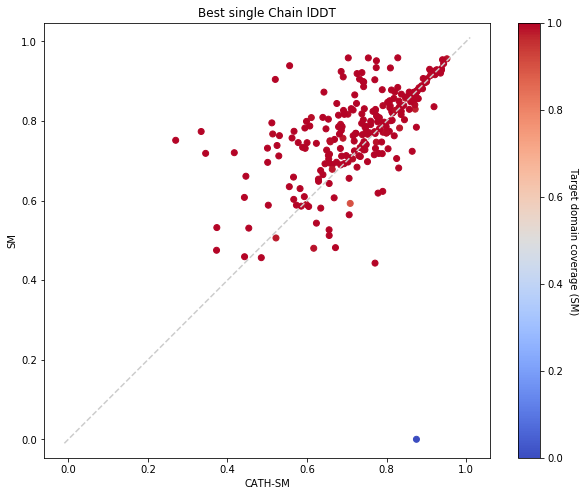

In [24]:
# Single chain lDDT plot
import matplotlib as mpl
import matplotlib.pyplot as plt
# %matplotlib nbagg
%matplotlib inline
# %matplotlib notebook
mpl.rcParams["figure.figsize"] = (10, 8)
# Identity line
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
ax = plt.gca()
plt.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".8")
# Main plot
plt.scatter(besthits_top_sm['cathsm_single_chain_lddt'], besthits_top_sm['sm_single_chain_lddt'],
            c=besthits_top_sm['sm_coverage'], cmap='coolwarm')
# Axis labels
plt.title("Best single Chain lDDT")
plt.xlabel("CATH-SM")
plt.ylabel("SM")
# Setup color bar
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
plt.axis('equal')
cbar.set_label('Target domain coverage (SM)', rotation=270)
plt.show()

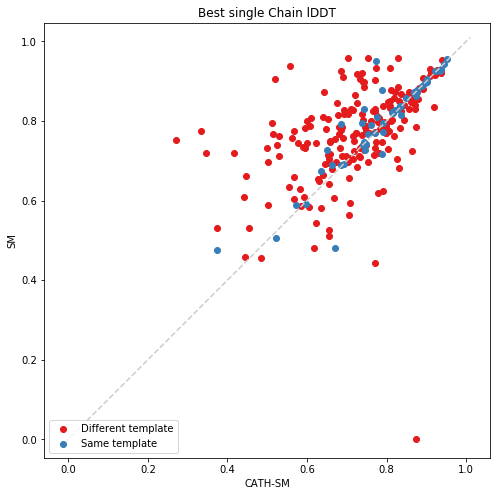

In [25]:
# Single chain lDDT plot - color by template identity
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# %matplotlib nbagg
%matplotlib inline
# %matplotlib notebook
mpl.rcParams["figure.figsize"] = (8, 8)
# Identity line
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
ax = plt.gca()
plt.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".8")
# Main plot
same_template = besthits_top_sm[besthits_top_sm['same_template_md5']]
#same_template = same_template[same_template['target'] == '20181103_00000042_1']
diff_template = besthits_top_sm[besthits_top_sm['same_template_md5'] == False]
#diff_template = diff_template[diff_template['target'] == '20181103_00000042_1']
plt.scatter(diff_template['cathsm_single_chain_lddt'], 
            diff_template['sm_single_chain_lddt'], 
            c=np.array([plt.cm.Set1(0)]), label="Different template")
plt.scatter(same_template['cathsm_single_chain_lddt'], 
            same_template['sm_single_chain_lddt'], 
            c=np.array([plt.cm.Set1(1)]), label="Same template")

# Axis labels
plt.title("Best single Chain lDDT")
plt.xlabel("CATH-SM")
plt.ylabel("SM")
# Setup legend
plt.legend(loc='lower left')
cbar.ax.get_yaxis().labelpad = 15
plt.axis('equal')
plt.show()